In [1]:
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Float, Integer, String, Date
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as sts
import sqlite3 
%matplotlib inline

In [2]:
import dash

from dash import dash_table
from dash import dcc
from dash import html

In [3]:
from dash.dependencies import Input, Output
import seaborn as sns

In [4]:
directory_filepath = "Resources/directory.csv"


In [5]:
#Create a new dataframe from the directory CSV
directory_data = pd.read_csv(directory_filepath)

dir_df = pd.DataFrame(directory_data)

dir_df.head(10)


,Brand,Store Name,Ownership Type,Street Address,State/Province,Country,Longitude,Latitude
0,Starbucks,"Meritxell, 96",Licensed,"Av. Meritxell, 96",7,AD,1.53,42.51
1,Starbucks,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",AJ,AE,55.47,25.42
2,Starbucks,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,AJ,AE,55.47,25.39
3,Starbucks,Twofour 54,Licensed,Al Salam Street,AZ,AE,54.38,24.48
4,Starbucks,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",AZ,AE,54.54,24.51
5,Starbucks,"Dalma Mall, Ground Floor",Licensed,"Dalma Mall, Mussafah",AZ,AE,54.49,24.40
6,Starbucks,"Dalma Mall, Level 1",Licensed,"Dalma Mall, Mussafah",AZ,AE,54.49,24.40
7,Starbucks,Debenhams Yas Mall,Licensed,Yas Island,AZ,AE,54.61,24.46
8,Starbucks,Khalidiya Street,Licensed,Khalidiya St.,AZ,AE,55.69,24.19
9,Starbucks,Eastern Mangroves,Licensed,"Al Salam Street, The Mangroves",AZ,AE,54.38,24.48


In [6]:
#Create a dataframe to load to the new sqlite db
stores_df = pd.DataFrame(dir_df[['Brand', 'Store Name', 'Ownership Type', 'State/Province','Country']])
stores_df = stores_df.rename_axis("Id")
stores_df.rename(columns = {'Brand': 'BRAND', 'Store Name':'Store_Name', 'Ownership Type':'Ownership_type', 'State/Province':'State'}, inplace=True)
stores_df.head(400)


,BRAND,Store_Name,Ownership_type,State,Country
Id,,,,,
0,Starbucks,"Meritxell, 96",Licensed,7,AD
1,Starbucks,Ajman Drive Thru,Licensed,AJ,AE
2,Starbucks,Dana Mall,Licensed,AJ,AE
3,Starbucks,Twofour 54,Licensed,AZ,AE
4,Starbucks,Al Ain Tower,Licensed,AZ,AE
...,...,...,...,...,...
395,Starbucks,Ribeirao Shopping Store 2,Company Owned,SP,BR
396,Starbucks,Ribeirao Shop Quiosque Expansao C&C,Company Owned,SP,BR
397,Starbucks,Shopping ABC,Company Owned,SP,BR


In [7]:
# Create engine for establishing the new sqlite db

engine = create_engine(f"sqlite:///stores.sqlite")
conn = engine.connect()

In [8]:
#Use engine.execute to create table
engine.execute('CREATE TABLE "Starbucks_data" ('
               'Id INT,'
               'BRAND VARCHAR,' 
               'Store_Name VARCHAR,'
               'Ownership_type VARCHAR,'
               'State VARCHAR,'
               'Country VARCHAR);')

In [9]:
#Load the data from the stores dataframe to the sqlite  table
stores_df.to_sql(name='Starbucks_data', con=conn, if_exists='append')
stores_df
temp_df = stores_df.groupby(['Store_Name'])['Country'].unique
display(temp_df)

<function pandas.core.groupby.groupby.BaseGroupBy._make_wrapper.<locals>.wrapper(*args, **kwargs)>

In [10]:
# df_grouped_conf=stores_df.groupby('Country== "US"')['Ownership_type'].unique()
# display(df_grouped_conf)
df_grouped_conf=stores_df.groupby(['Ownership_type'])['Country'].count()
display(df_grouped_conf)

Ownership_type
Company Owned    11932
Franchise          317
Joint Venture     3976
Licensed          9375
Name: Country, dtype: int64

In [11]:
Country = pd.DataFrame(stores_df)['Country'].unique()
Country

array(['AD', 'AE', 'AR', 'AT', 'AU', 'AW', 'AZ', 'BE', 'BG', 'BH', 'BN',
       'BO', 'BR', 'BS', 'CA', 'CH', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY',
       'CZ', 'DE', 'DK', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HU',
       'ID', 'IE', 'IN', 'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LB', 'LU',
       'MA', 'MC', 'MX', 'MY', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH',
       'PL', 'PR', 'PT', 'QA', 'RO', 'RU', 'SA', 'SE', 'SG', 'SK', 'SV',
       'TH', 'TR', 'TT', 'TW', 'US', 'VN', 'ZA'], dtype=object)

In [12]:
ownership = pd.DataFrame(stores_df)['Ownership_type'].unique()
ownership

array(['Licensed', 'Joint Venture', 'Company Owned', 'Franchise'],
      dtype=object)

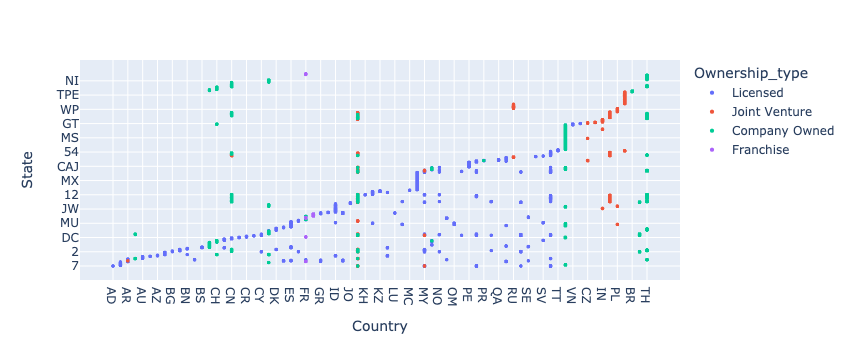

FileNotFoundError: [Errno 2] No such file or directory: 'HTML/Country.html'

<Figure size 4320x1440 with 0 Axes>

In [22]:
fig = px.scatter(stores_df, x='Country',
                y='State',
                color='Ownership_type',
                hover_data=['Country','State'],size_max = 200)

fig.update_traces(marker={'size':4}) 
plt.figure(figsize=(60,20))
fig.show()
plt.savefig("Images/Country.png")
fig.write_html("HTML/Country.html")



In [19]:
countries = ['AD', 'AE', 'AR', 'AT', 'AU', 'AW', 'AZ', 'BE', 'BG', 'BH', 'BN',
       'BO', 'BR', 'BS', 'CA', 'CH', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY',
       'CZ', 'DE', 'DK', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HU',
       'ID', 'IE', 'IN', 'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LB', 'LU',
       'MA', 'MC', 'MX', 'MY', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH',
       'PL', 'PR', 'PT', 'QA', 'RO', 'RU', 'SA', 'SE', 'SG', 'SK', 'SV',
       'TH', 'TR', 'TT', 'TW', 'US', 'VN', 'ZA']
# new_country = []

# for row in countries:
#     Country_stores = stores_df.loc[stores_df["Country"] == 'US']
#     new_country.append(Country_stores)

# new_country


In [20]:
State_ownership_types = stores_df.loc[stores_df["Country"]=='US'][["State","Ownership_type"]]
State_ownership_types
State_ownership_count = stores_df.groupby(["Country","State","Ownership_type"]).count()
State_ownership_count
fig = px.scatter(State_ownership_types, x='Country',
                y='State',
                color='Ownership_type',
                hover_data=['Country'],size_max = 200)

fig.update_traces(marker={'size':4}) 
plt.figure(figsize=(60,20))
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['State', 'Ownership_type'] but received: Country